# Week 07, Part 1

### Topic
 1. Confidence interval Examples
   1. Another example: using fishdata
   1. Example with Ozone dataset
 1. BACK TO SLIDES FOR HYPOTHESIS TESTING


In [23]:
# resize
require(repr)
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=300)

Loading required package: repr



We'll make use of the plot polygon function:

In [24]:
source('../week04/plot_polygons.R')

## 1. Examples

### 1.A Another example: using fishdata


Let's say we want to generate a sample from the log of the trade in USD and calculate a mean using this sample. How "good" is this measurement?  How do we quantify this?

Let's start by loading the fishdata:

In [25]:
fishdata = read.csv("../week02/undata_fish_2020.csv")
log_trade_usd = log10(fishdata$Trade..USD.)

Let's say we have a sample of this data:

In [26]:
nsamples = 20
mysample = log_trade_usd[sample(1:length(log_trade_usd),nsamples,replace=FALSE)]

We can calcualate the mean of this sample:

In [27]:
mean_fish = mean(mysample)

And the standard error:

In [28]:
SE_fish = sd(mysample)/nsamples^0.5

What is the 72% confidence interval for our sample mean?

We can do our setup much in the same way as before:

In [29]:
confidence_percent = 0.72 # try other values

Calculate what is in the tails, percentage wise:

In [30]:
percent_tails = (1.0 - confidence_percent)/2.0 

Arbitrary Z-star (Z-score) for the percent in the tails:

In [31]:
Z_star = qnorm(1-percent_tails) # = 1.96 for 95%
print(Z_star)

[1] 1.080319


The only difference now is what Standard Error we are using:

In [32]:
interval = Z_star*SE_fish

Finally print:

In [33]:
print(paste("Estimate of sample mean is", mean_fish, '+/-', interval))

[1] "Estimate of sample mean is 4.32723148542469 +/- 0.364755862621222"


In this way - we can get an arbitrary confidence interval about this mean.

### 1.B Example with Ozone dataset


Don't forget to store this file somewhere you know where it is!

In [34]:
ozone = read.csv('ozone2.csv')

Check out this dataset a bit:

In [35]:
head(ozone)

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,4,3.01,5480,8,20.00000,37.78175,35.31509,5000.000,-15,30.56000,200
2,1,2,5,3.20,5660,6,48.41432,38.00000,45.79294,4060.589,-14,46.86914,300
3,1,3,6,2.70,5710,4,28.00000,40.00000,48.48006,2693.000,-25,47.66000,250
4,1,4,7,5.18,5700,3,37.00000,45.00000,49.19898,590.000,-24,55.04000,100
5,1,5,1,5.34,5760,3,51.00000,54.00000,45.32000,1450.000,25,57.02000,60
6,1,6,2,5.77,5720,4,69.00000,35.00000,49.64000,1568.000,15,53.78000,60


So there are a lot of random looking things there - we'll actually use this dataset again for linear regression (I think), but right now we're just going to look at some temperature readings.

Make a temperature vector:

In [36]:
temp_sandburg = ozone[,names(ozone)=="Temperature_Sandburg"]

Let's check out the distribution of this temperature:

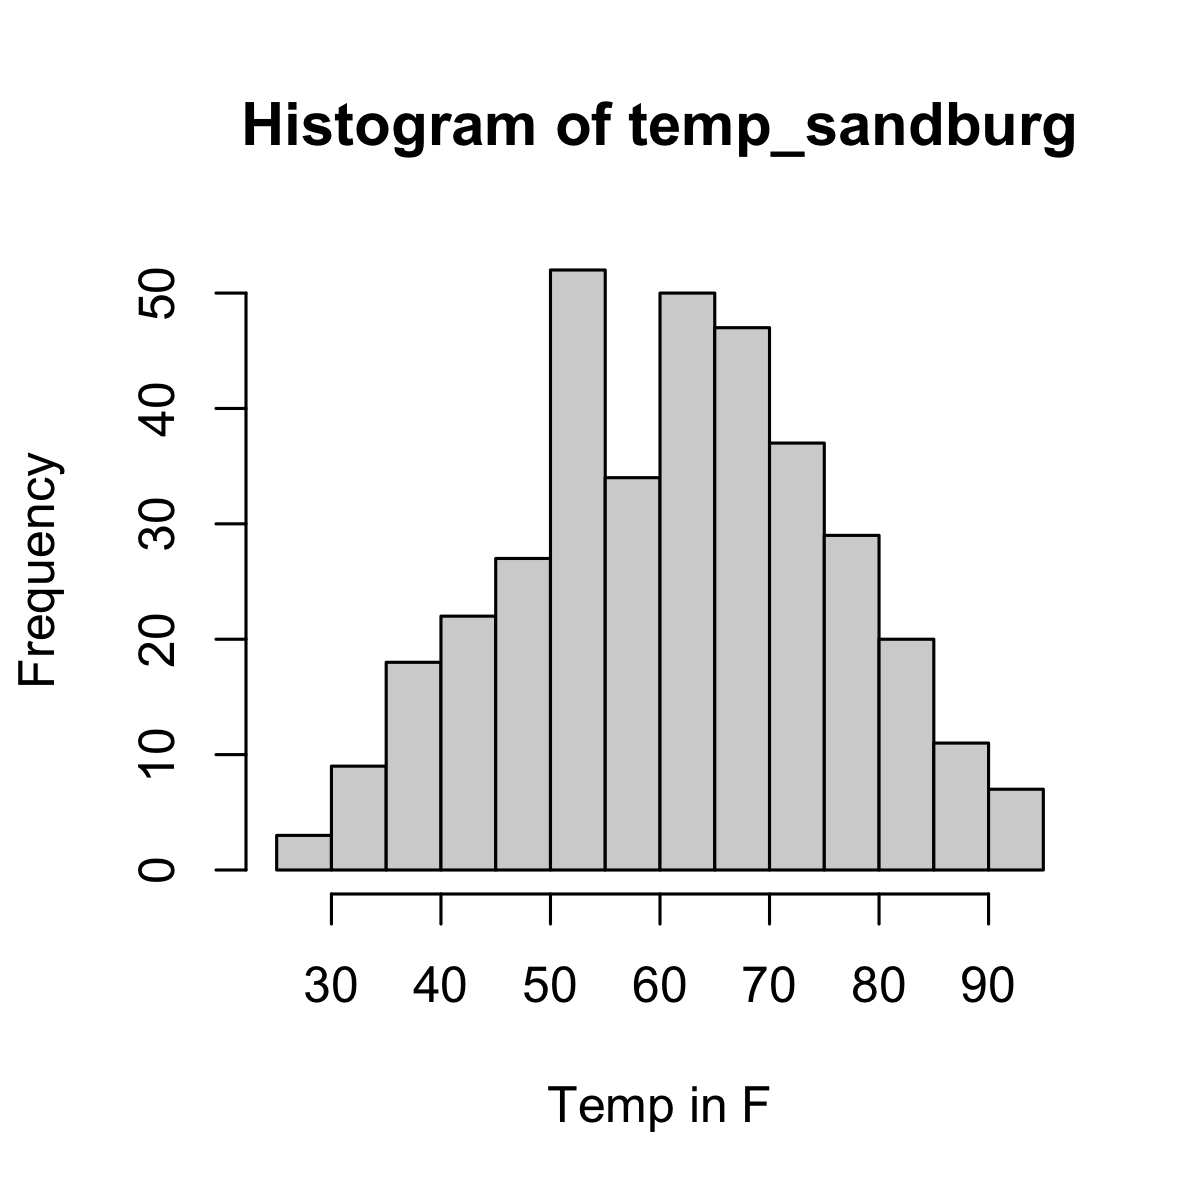

In [37]:
options(repr.plot.width=4, repr.plot.height=4)

hist(temp_sandburg, xlab='Temp in F', ylab = 'Frequency')

It looks like the mean temperature at Sandburg (airbase) is ~ 60?  Let's calculate:

In [38]:
mean_sandburg = mean(temp_sandburg)
print(mean_sandburg)

[1] 61.85215


How confident are we about this mean?


In [39]:
confidence_percent = 0.99
percentile_tails = (1.0-confidence_percent)/2.0 
Z_star = qnorm(percentile_tails, lower.tail=FALSE) # again, either way is fine
Z_star = qnorm(1-percentile_tails)

Creating a point estimate: sample_mean $\pm$ z* X SE:

In [40]:
SE_sandburg = sd(temp_sandburg)/length(temp_sandburg)**0.5

In [41]:
interval = Z_star*SE_sandburg

In [42]:
print(paste("Estimate of sample mean is ", mean_sandburg, "+/-", interval))

[1] "Estimate of sample mean is  61.8521477080962 +/- 1.92445833705318"


This seems overly small given the width of the Sandburg temperature distribution - any guesses to why that is? *THINK ON IT A BIT!*

This is because we are trying to compare 2 different things.

The width of the histogram of the Sandburg temperatures gives a us a measure of how the temperature changes at Sandburg over the time period of this dataset (a year).

The confidence interval we calculated gives us how much we expect the *mean of this distribution to change* if we go out and re-collect a sample.

We can sort of *fake* this by simulating doing a sample of this dataset and calculating its mean a few times - giving us the distribution of sample means:

In [43]:
mymeans = c() # where the sample means are stored

nsamples = 10 # *Try changing this parameter and see how the plot and SE change*

nmeans = 300 #start with 5
for (i in 0:nmeans){
  mysample = temp_sandburg[sample(1:length(temp_sandburg), nsamples, replace=FALSE)]
  mymeans = append(mymeans, mean(mysample))
}

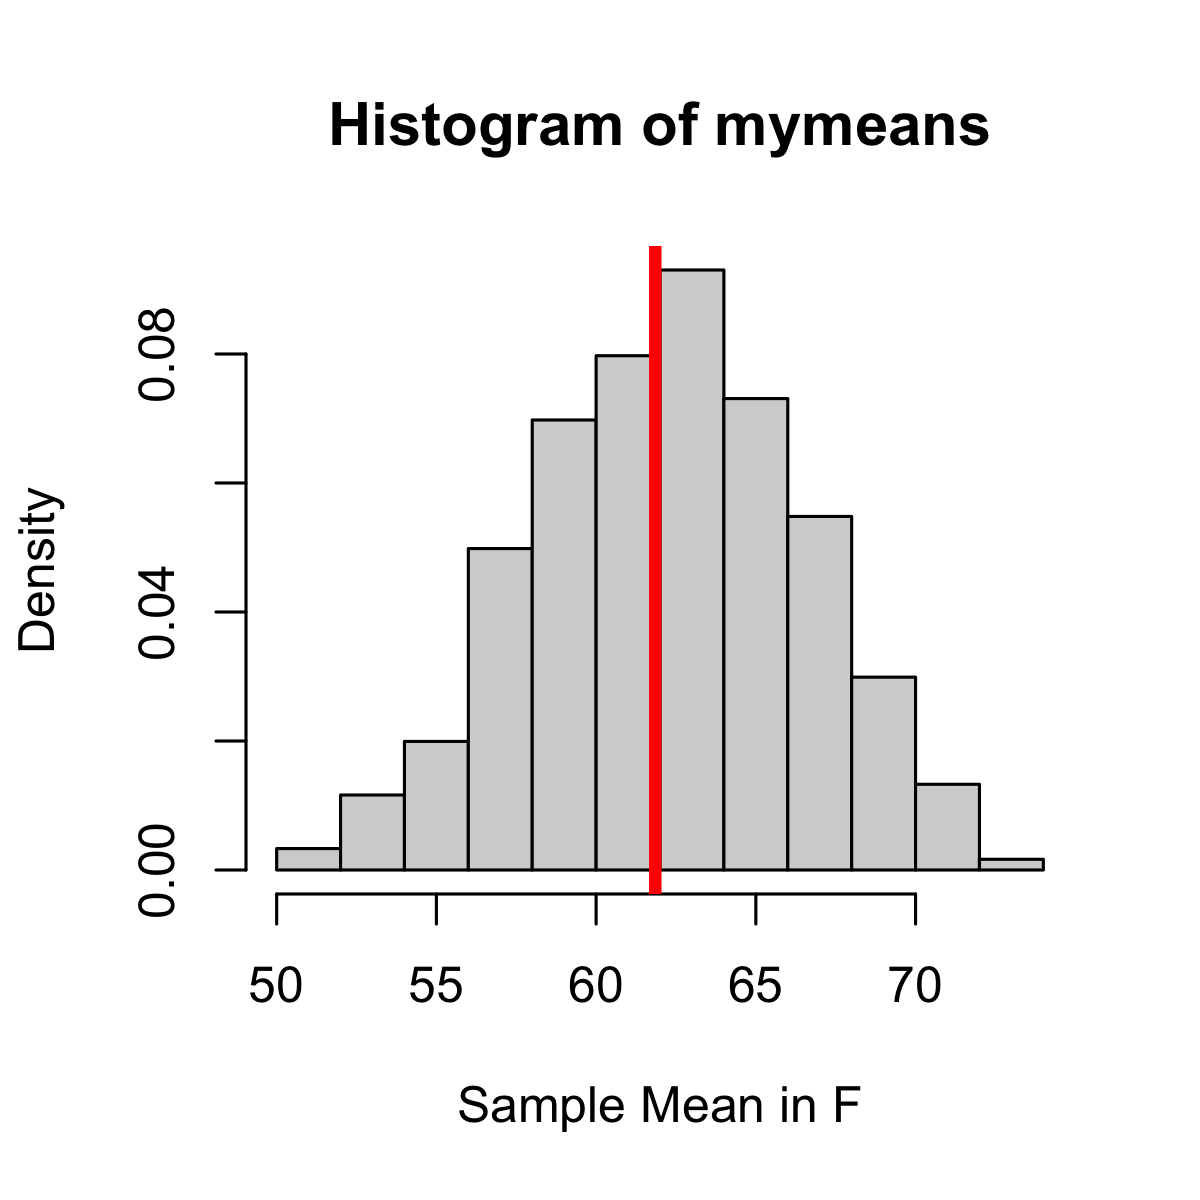

In [44]:
hist(mymeans, xlab="Sample Mean in F", prob=TRUE)
# lets plot the actual population mean
abline(v=mean(temp_sandburg), col="red", lwd=4)

So something like a few 10s (depends on number of sample means calculated).

First, calculate its standard error:

In [45]:
SE = sd(mysample)/nsamples^0.5
print(SE)

[1] 4.582576


This SE matches up better with our sample mean distribution that we have plotted.

We can see if we change the number of samples (change nsample) the width of our distribution of means changes and so does SE.  This is what SE is measuring!

If we have a naturally wider population and therefore sample distribution (the sample SD is bigger) than our measure of SE is indeed bigger (SE is proportional to SD of the sample), *but* we can get better and better estimates of the true population mean if we have larger sample sizes since SE is also proportional to 1/nsamples$^2$.